In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [2]:
w_h_data = pd.read_csv('raw_data/WHR_2005-2024.csv')
inf_data = pd.read_csv('raw_data/WHI_Inflation.csv')
life_data = pd.read_csv('raw_data/Life_expectancy.csv')
suicide_data = pd.read_csv('raw_data/Suicide_Rate.csv')
gci_data = pd.read_csv('raw_data/world_data_2023.csv')


Renamed/fixed the columns and sorted by year for world happiness dataframe.

In [3]:
w_h_data = w_h_data.rename(columns={
    'Log GDP per capita': 'GDP_per_capita',
    'Healthy life expectency at birth': 'Life_expectency',
    'Freedom to make life choices': 'Life_choices'
})
w_h_data_trans = w_h_data.T.reset_index()
w_h_data_trans['index'] = w_h_data_trans['index'].str.replace(' ', '_')
w_h_data_trans['index'] = w_h_data_trans['index'].map(str.lower)
w_h_data_trans

reset_w_h_data = w_h_data_trans.set_index('index').T
w_h_data = reset_w_h_data
w_h_data.round(2)
w_h_data

index,country_name,year,life_ladder,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.72359,7.350416,0.450662,50.5,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.6139,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.77562,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.59605,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.29622,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.19135


Combined life/life expectancy and suidide rate dataframes into one dataframe. Renamed/fixed column names.

In [4]:
life_death_data = pd.merge(life_data, suicide_data, on='Country', how='outer')
life_death_data
life_death_data = life_death_data.rename(columns={
    'Life Expectancy (years) - Men': 'male_life_expectancy',
    'Life Expectancy (years) - Women': 'female_life_expectancy',
    'Fertility Rate (births per woman)': 'fertility_rate'
})
life_death_data

life_death_data_trans = life_death_data.T.reset_index()
life_death_data_trans['index'] = life_death_data_trans['index'].str.replace(' ', '_')
life_death_data_trans['index'] = life_death_data_trans['index'].map(str.lower)
life_death_data_trans

reset_life_death_data = life_death_data_trans.set_index('index').T
life_death_data = reset_life_death_data
life_death_data


index,country,male_life_expectancy,female_life_expectancy,happiness_score,fertility_rate,gdp_per_capita,suicide_rate
0,Afghanistan,60.6,68.2,3.794,4.7,"1,105",20.6
1,Albania,74.8,81.3,4.959,1.7,"4,932",32.4
2,Algeria,73.3,78.9,5.605,2.9,"4,534",15.6
3,Andorra,81.7,84.8,6.955,1.4,"46,622",18.9
4,Angola,58.1,65.6,4.105,5.3,"2,077",20.5
...,...,...,...,...,...,...,...
145,Switzerland,NaN,NaN,NaN,NaN,"83,832",12.9
146,Thailand,NaN,NaN,NaN,NaN,"6,792",27.8
147,United Arab Emirates,76.3,80.6,6.39,2.6,NaN,NaN
148,United Kingdom,79.0,83.0,6.72,1.7,"39,720",11.1


Dropping unneeded columns (already have in other data), fixed column names, sorted by year for inflation data.

In [5]:
inf_data = inf_data.drop(['Official Core Consumer Price Inflation', 'Headline Consumer Price Inflation', 'Producer Price Inflation', 'Continent/Region', 'Generosity','Perceptions of corruption', 'Healthy life expectancy at birth', 'Social support'], axis=1)

inf_data_trans = inf_data.T.reset_index()
inf_data_trans['index'] = inf_data_trans['index'].str.replace(' ', '_')
inf_data_trans['index'] = inf_data_trans['index'].map(str.lower)
inf_data_trans

reset_inf_data = inf_data_trans.set_index('index').T
inf_data = reset_inf_data

inf_data = inf_data.rename(columns={
    'energy_consumer_price_inflation': 'energy_inflation',
    'food_consumer_price_inflation': 'food_inflation',
    'gdp_deflator_index_growth_rate': 'gdp_deflator_index'
})

inf_data


index,country,year,energy_inflation,food_inflation,gdp_deflator_index,score,gdp_per_capita,freedom_to_make_life_choices
0,Afghanistan,2015,-4.25,-0.84,2.66509,3.575,0.31982,0.23414
1,Afghanistan,2016,2.07,5.67,-2.409509,3.36,0.38227,0.1643
2,Afghanistan,2017,4.44,6.94,2.404,3.794,0.401477,0.10618
3,Afghanistan,2018,1.474185,-1.045952,2.071208,3.632,0.332,0.085
4,Afghanistan,2019,-2.494359,3.79477,6.520928,3.203,0.35,0.0
...,...,...,...,...,...,...,...,...
1227,Zimbabwe,2019,90.808071,86.124371,-4.035235,3.663,0.366,0.361
1228,Zimbabwe,2020,306.431673,601.020236,568.971862,3.2992,0.425564,0.377405
1229,Zimbabwe,2021,69.82,105.8,113.294981,3.145,0.457,0.359
1230,Zimbabwe,2022,97.24655,149.967034,113.018434,2.995,0.947,0.329


Removing NAN from inflation data

In [6]:
nan_count1 = inf_data.isnull().sum()
columns_to_fill1 = ['energy_inflation', 'food_inflation', 'gdp_deflator_index' ]
for col in columns_to_fill1:
    inf_data[col] = inf_data[col].fillna('No data')

nan_count1
inf_data.round(2)
inf_data


index,country,year,energy_inflation,food_inflation,gdp_deflator_index,score,gdp_per_capita,freedom_to_make_life_choices
0,Afghanistan,2015,-4.25,-0.84,2.66509,3.575,0.31982,0.23414
1,Afghanistan,2016,2.07,5.67,-2.409509,3.36,0.38227,0.1643
2,Afghanistan,2017,4.44,6.94,2.404,3.794,0.401477,0.10618
3,Afghanistan,2018,1.474185,-1.045952,2.071208,3.632,0.332,0.085
4,Afghanistan,2019,-2.494359,3.79477,6.520928,3.203,0.35,0.0
...,...,...,...,...,...,...,...,...
1227,Zimbabwe,2019,90.808071,86.124371,-4.035235,3.663,0.366,0.361
1228,Zimbabwe,2020,306.431673,601.020236,568.971862,3.2992,0.425564,0.377405
1229,Zimbabwe,2021,69.82,105.8,113.294981,3.145,0.457,0.359
1230,Zimbabwe,2022,97.24655,149.967034,113.018434,2.995,0.947,0.329


Removing NAN for life expectancy and suicide rate data

In [7]:
nan_count2 = life_death_data.isnull().sum()
columns_to_fill2 = ['male_life_expectancy', 'female_life_expectancy', 'happiness_score', 'fertility_rate', 'gdp_per_capita', 'suicide_rate']
for col in columns_to_fill2:
    life_death_data[col] = life_death_data[col].fillna('No data')

nan_count2

index
country                    0
male_life_expectancy       8
female_life_expectancy     8
happiness_score            8
fertility_rate             8
gdp_per_capita            10
suicide_rate              10
dtype: int64

Removing NAN from world happiness data. Due to the inability to see where the data shifted from one country to another, I could not use means/averages to fill spots. I did do some of that where possible in excel before moving the data to vscode.

In [8]:
nan_count3 = w_h_data.isnull().sum()
columns_to_fill3 = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'life_choices', 'generosity', 'perceptions_of_corruption', 'positive_affect', 'negative_affect']
for col in columns_to_fill3:
    w_h_data[col] = w_h_data[col].fillna('No data')

nan_count3

index
country_name                          0
year                                  0
life_ladder                           0
gdp_per_capita                       21
social_support                       13
healthy_life_expectancy_at_birth     63
life_choices                         22
generosity                           77
perceptions_of_corruption           121
positive_affect                       7
negative_affect                       6
dtype: int64

Removing/fixing colums for GCI data

In [9]:
gci_data = gci_data.drop(['Density', 'Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)', 'Calling Code', 'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Currency-Code', 'Forested Area (%)', 'Gasoline Price', 'Largest city', 'Official language', 'Urban_population', 'Total tax rate', 'Latitude', 'Longitude'], axis=1)
gci_data_trans = gci_data.T.reset_index()
gci_data_trans['index'] = gci_data_trans['index'].str.replace(' ', '_')
gci_data_trans['index'] = gci_data_trans['index'].map(str.lower)

reset_gci_data = gci_data_trans.set_index('index').T
gci_data = reset_gci_data
gci_data = gci_data.rename(columns={
    'gross_primary_education_enrollment_(%)': 'primary_education_enrollment',
    'gross_tertiary_education_enrollment_(%)': 'tertiary_education_enrollment',
    'population:_labor_force_participation_(%)': 'labor_force_participation',
    'tax_revenue_(%)': 'tax_revenue'
})

columns_to_fill5 = ['gdp', 'minimum_wage']
for col in columns_to_fill5:
    gci_data[col] = gci_data[col].str.replace('$', '')
columns_to_fill6 = ['primary_education_enrollment', 'tertiary_education_enrollment', 'out_of_pocket_health_expenditure', 'labor_force_participation', 'tax_revenue', 'unemployment_rate']
for col in columns_to_fill6:
    gci_data[col] = gci_data[col].str.replace('%', '')
columns_to_fill7 = ['gdp', 'population']
for col in columns_to_fill7:
    gci_data[col] = gci_data[col].str.replace(',', '')

gci_data.round(2)
gci_data

index,country,armed_forces_size,birth_rate,fertility_rate,gdp,primary_education_enrollment,tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,labor_force_participation,tax_revenue,unemployment_rate
0,Afghanistan,"323,000",32.49,4.47,19101353833,104.00,9.70,47.9,64.5,638.0,0.43,78.40,0.28,38041754,48.90,9.30,11.12
1,Albania,"9,000",11.78,1.62,15278077447,107.00,55.00,7.8,78.5,15.0,1.12,56.90,1.2,2854191,55.70,18.60,12.33
2,Algeria,"317,000",24.28,3.02,169988236398,109.90,51.40,20.1,76.7,112.0,0.95,28.10,1.72,43053054,41.20,37.20,11.70
3,Andorra,NaN,7.2,1.27,3154057987,106.40,NaN,2.7,NaN,NaN,6.63,36.40,3.33,77142,NaN,NaN,NaN
4,Angola,"117,000",40.73,5.52,94635415870,113.50,9.30,51.6,60.8,241.0,0.71,33.40,0.21,31825295,77.50,9.20,6.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,"343,000",17.88,2.27,482359318768,97.20,79.30,21.4,72.1,125.0,0.01,45.80,1.92,28515829,59.70,NaN,8.80
190,Vietnam,"522,000",16.75,2.05,261921244843,110.60,28.50,16.5,75.3,43.0,0.73,43.50,0.82,96462106,77.40,19.10,2.01
191,Yemen,"40,000",30.45,3.79,26914402224,93.60,10.20,42.9,66.1,164.0,NaN,81.00,0.31,29161922,38.00,NaN,12.91
192,Zambia,"16,000",36.19,4.63,23064722446,98.70,4.10,40.4,63.5,213.0,0.24,27.50,1.19,17861030,74.60,16.20,11.43


Removing NAN from GCI data

In [10]:
nan_count4 = gci_data.isnull().sum()
columns_to_fill4 = ['armed_forces_size', 'birth_rate', 'fertility_rate', 'gdp', 'primary_education_enrollment', 'tertiary_education_enrollment', 'infant_mortality', 'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage', 'out_of_pocket_health_expenditure', 'physicians_per_thousand', 'labor_force_participation', 'tax_revenue', 'unemployment_rate']

for col in columns_to_fill4:
    gci_data[col] = gci_data[col].fillna('No data')

nan_count4

index
country                              0
armed_forces_size                   23
birth_rate                           5
fertility_rate                       6
gdp                                  1
primary_education_enrollment         6
tertiary_education_enrollment       11
infant_mortality                     5
life_expectancy                      7
maternal_mortality_ratio            13
minimum_wage                        44
out_of_pocket_health_expenditure     6
physicians_per_thousand              6
population                           0
labor_force_participation           18
tax_revenue                         25
unemployment_rate                   18
dtype: int64

For populations under 1 million (due to charting constraints), comparing healthy life expectancy and out of pocket healthcare costs in 2023. Anything over 25% was included as that is what WHO considers to be at risk. Over 40% is considered to be catastrophic spending on health care by WHO. Life expectancy was capped at 75 as WHO considered the high average for most countries to be 70+. 
You will see some countries have higher health costs than healthy life expectancy. 

C:\Users\turrr\AppData\Local\Temp\ipykernel_18128\3346480945.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gci_data2['out_of_pocket_health_expenditure'] = gci_data2['out_of_pocket_health_expenditure'].astype(float)
C:\Users\turrr\AppData\Local\Temp\ipykernel_18128\3346480945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gci_data3['life_expectancy'] = gci_data3['life_expectancy'].astype(float)


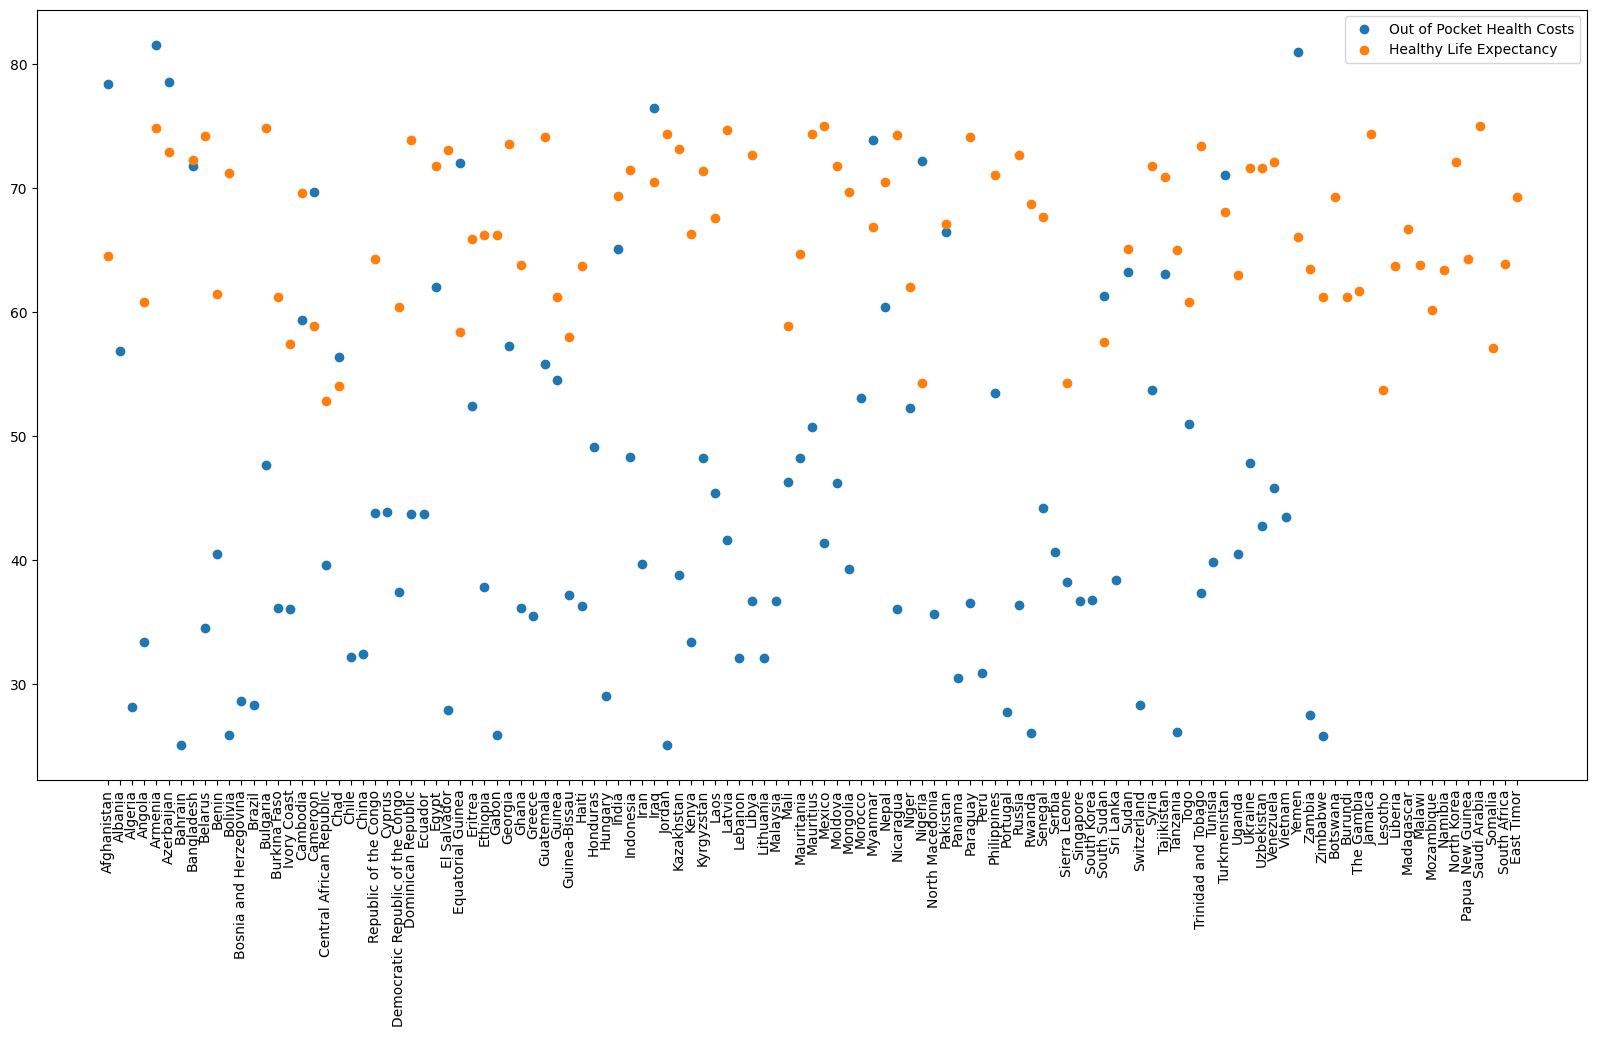

In [11]:
gci_data['population'] = gci_data['population'].astype(int)
gci_data = gci_data[gci_data['population'] > 1000000]
gci_data

gci_data2 = gci_data[~gci_data['out_of_pocket_health_expenditure'].isin(['No data'])]
gci_data2['out_of_pocket_health_expenditure'] = gci_data2['out_of_pocket_health_expenditure'].astype(float)
gci_data3 = gci_data[~gci_data['life_expectancy'].isin(['No data'])]
gci_data3['life_expectancy'] = gci_data3['life_expectancy'].astype(float)

health_cost = gci_data2[gci_data2['out_of_pocket_health_expenditure'] > 25]
life_span = gci_data3[gci_data3['life_expectancy'] <= 75]


plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(health_cost['country'], health_cost['out_of_pocket_health_expenditure'], label='Out of Pocket Health Costs')
plt.scatter(life_span['country'], life_span['life_expectancy'], label='Healthy Life Expectancy')
plt.legend()
plt.show()


Suicide rate and happiness score- low happiness scores do not necessarily contribute to suicide rates. Although the highest suicidest rate (40) went with a lower end happiness rate of 5, higher happiness ranking of 7 had suicide rates of 27 and 33, which was not far off 28, 30 and 32 which were also around a ranking of 5. (Rate per 100k)

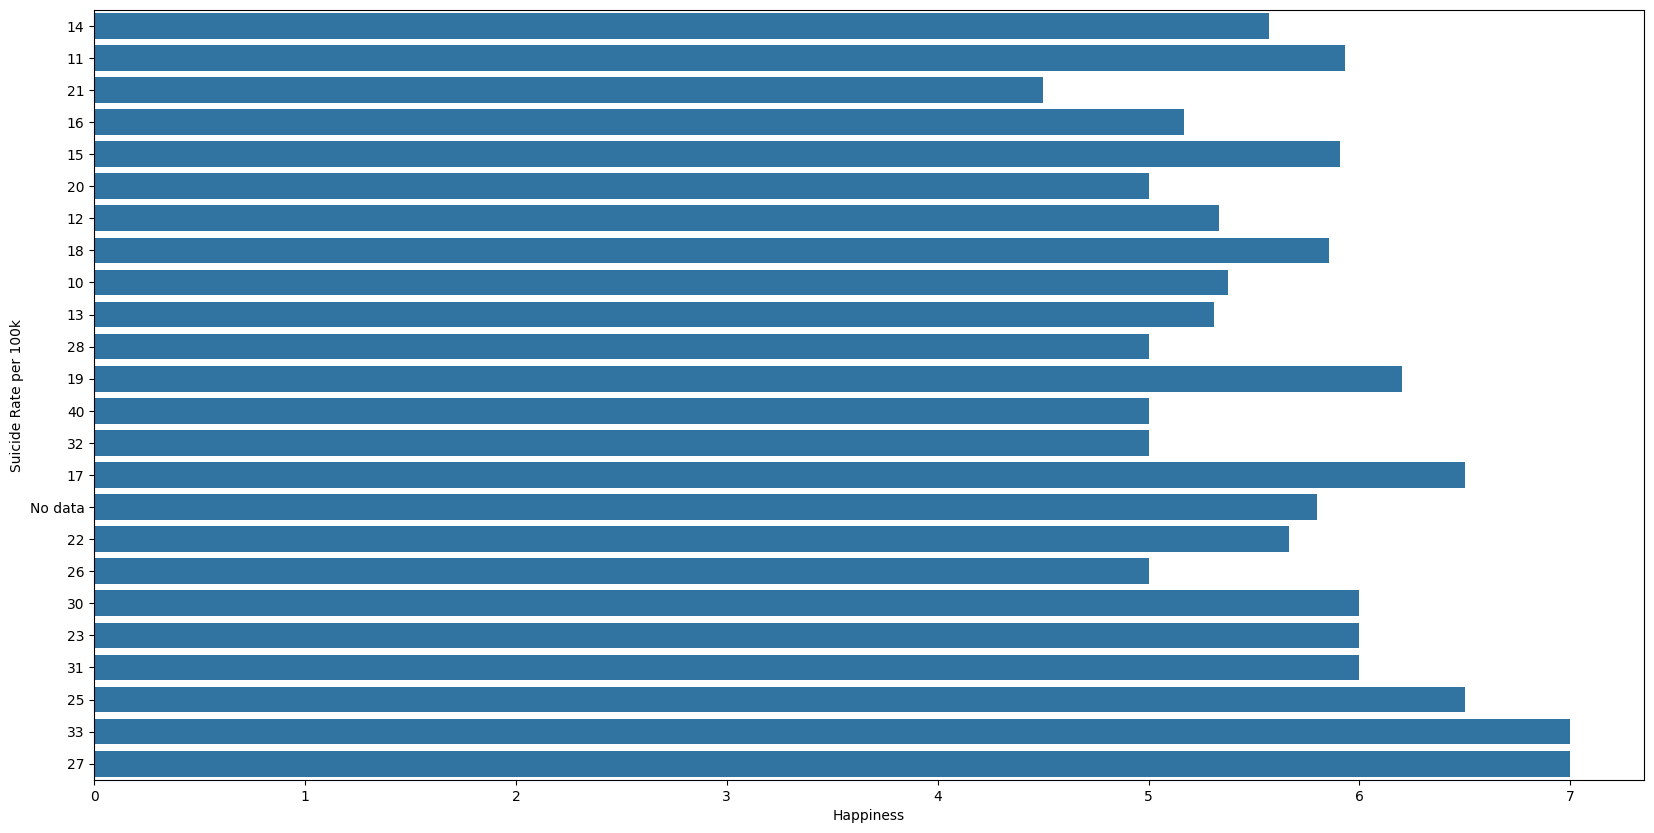

In [12]:
life_death_data2 = life_death_data[~life_death_data['suicide_rate'].isin(['No data'])]
life_death_data2 = life_death_data[~life_death_data['happiness_score'].isin(['No data'])]

life_death_data2 = life_death_data2.map(lambda x: int(round(x, 0)) if isinstance(x, (int, float)) else x)

plt.figure(figsize=(20,10))
order = life_death_data2.sort_values('happiness_score').suicide_rate
sns.barplot(x='happiness_score', y='suicide_rate', data=life_death_data2, errorbar=None, order=order)
plt.xlabel('Happiness')
plt.ylabel('Suicide Rate per 100k')
plt.show()

Fertility rate and happiness scores suggest that overall low happiness creates higher ferility rates (reproductive behavior). The world national average is 2.7.

In [13]:
world_rate = life_death_data2['fertility_rate'].mean()
world_rate

np.float64(2.7253521126760565)

Unhappy people reproduce more.

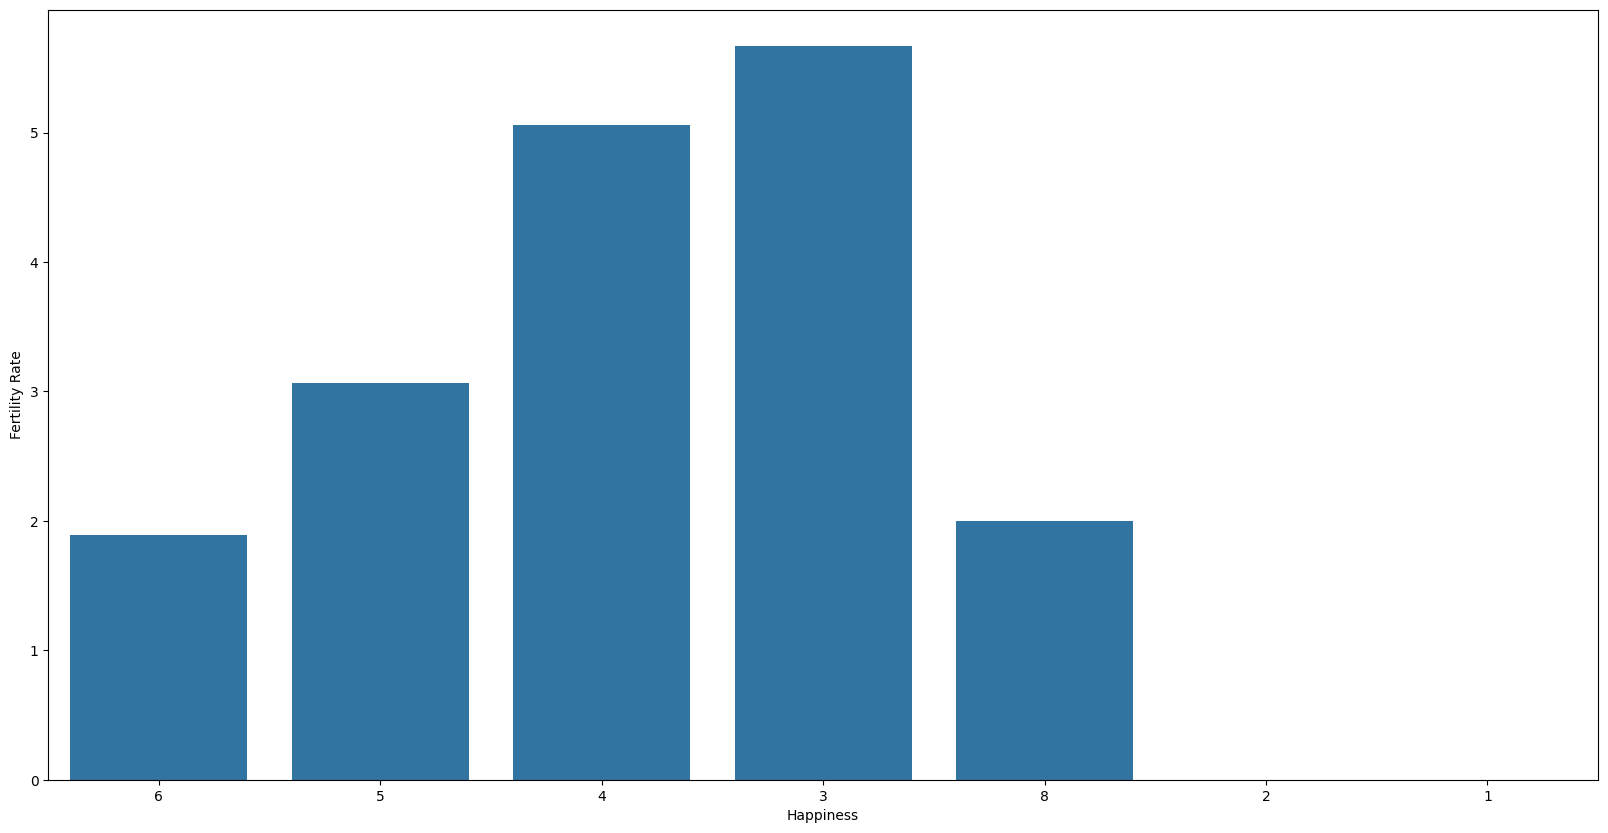

In [14]:
plt.figure(figsize=(20,10))
order = life_death_data2.sort_values('happiness_score').fertility_rate
sns.barplot(x='happiness_score', y='fertility_rate', data=life_death_data2, errorbar=None, order=order)
plt.xlabel('Happiness')
plt.ylabel('Fertility Rate')
plt.show()

Exploring the least happiest nations. These nations all have a happiness score of 3 or 4. There are 20 nations on this list. They also have lower life expectancy as the world average male avg is 72 and female avg is 77.

In [15]:
male_mean = life_death_data2['male_life_expectancy'].mean()
male_mean
female_mean = life_death_data2['female_life_expectancy'].mean()
female_mean


np.float64(77.15492957746478)

People in unhappy nations die earlier.

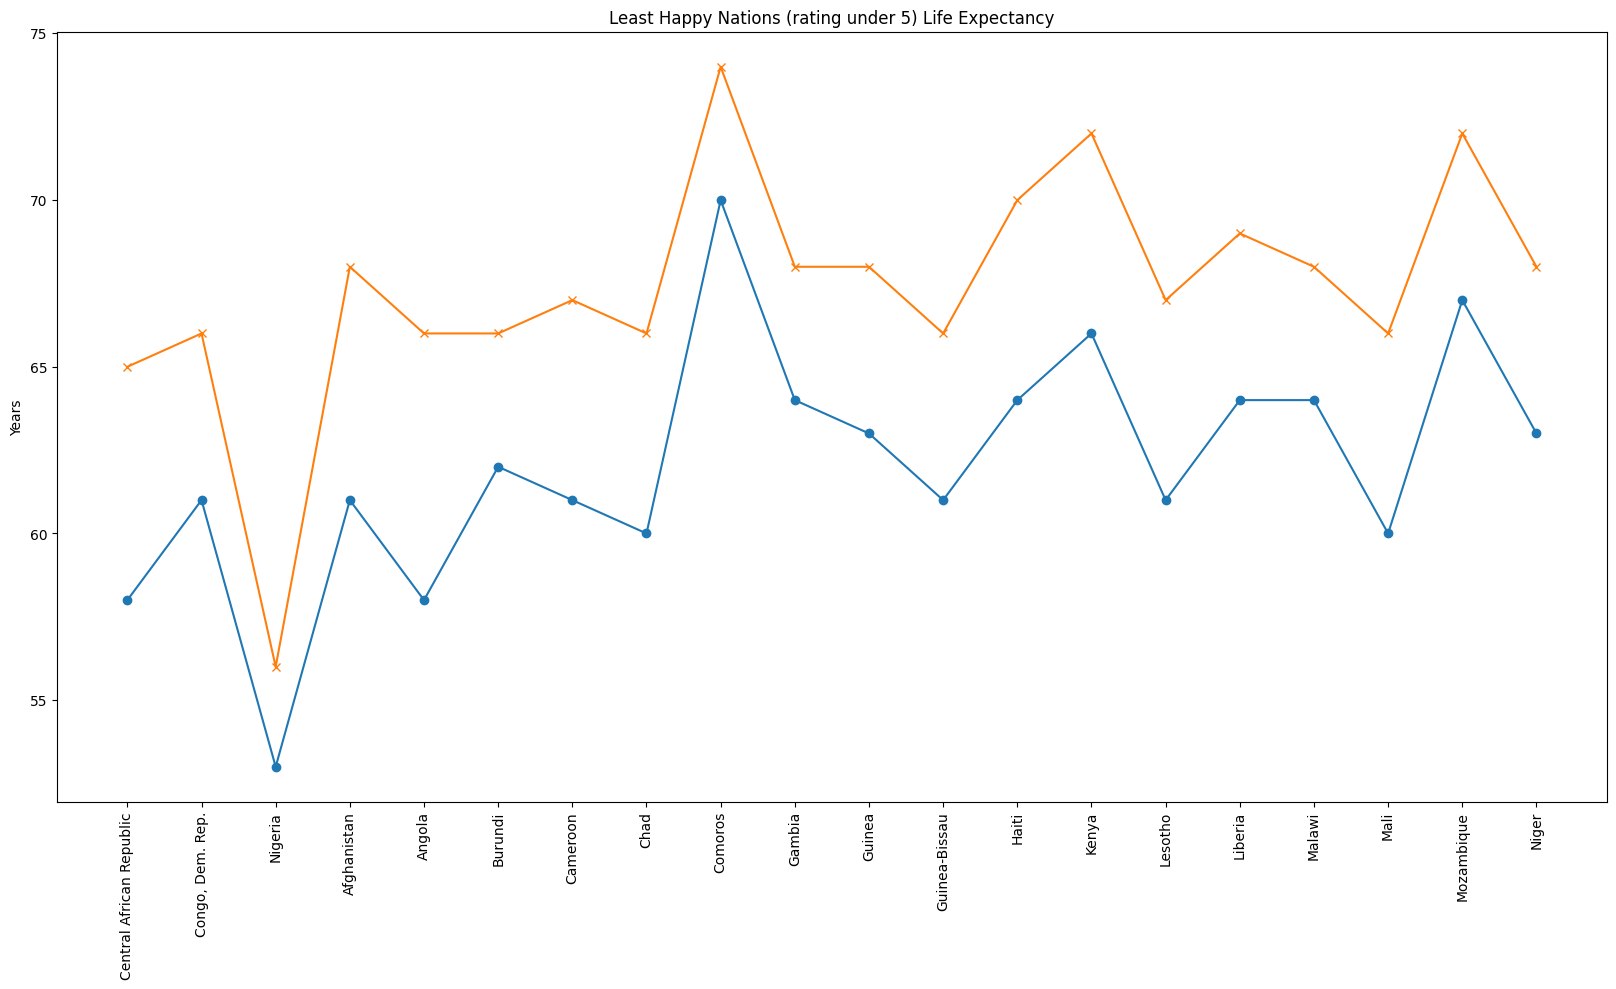

In [16]:
bottom_20 = life_death_data2.nsmallest(20, 'happiness_score')
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(bottom_20['country'], bottom_20['male_life_expectancy'], label= 'Male Life Expectency', marker='o')
plt.plot(bottom_20['country'], bottom_20['female_life_expectancy'], label='Female Life Expectancy', marker='x')



plt.ylabel('Years')
plt.title('Least Happy Nations (rating under 5) Life Expectancy')
plt.show()

Year by year happiness report on any country in the list, using input.

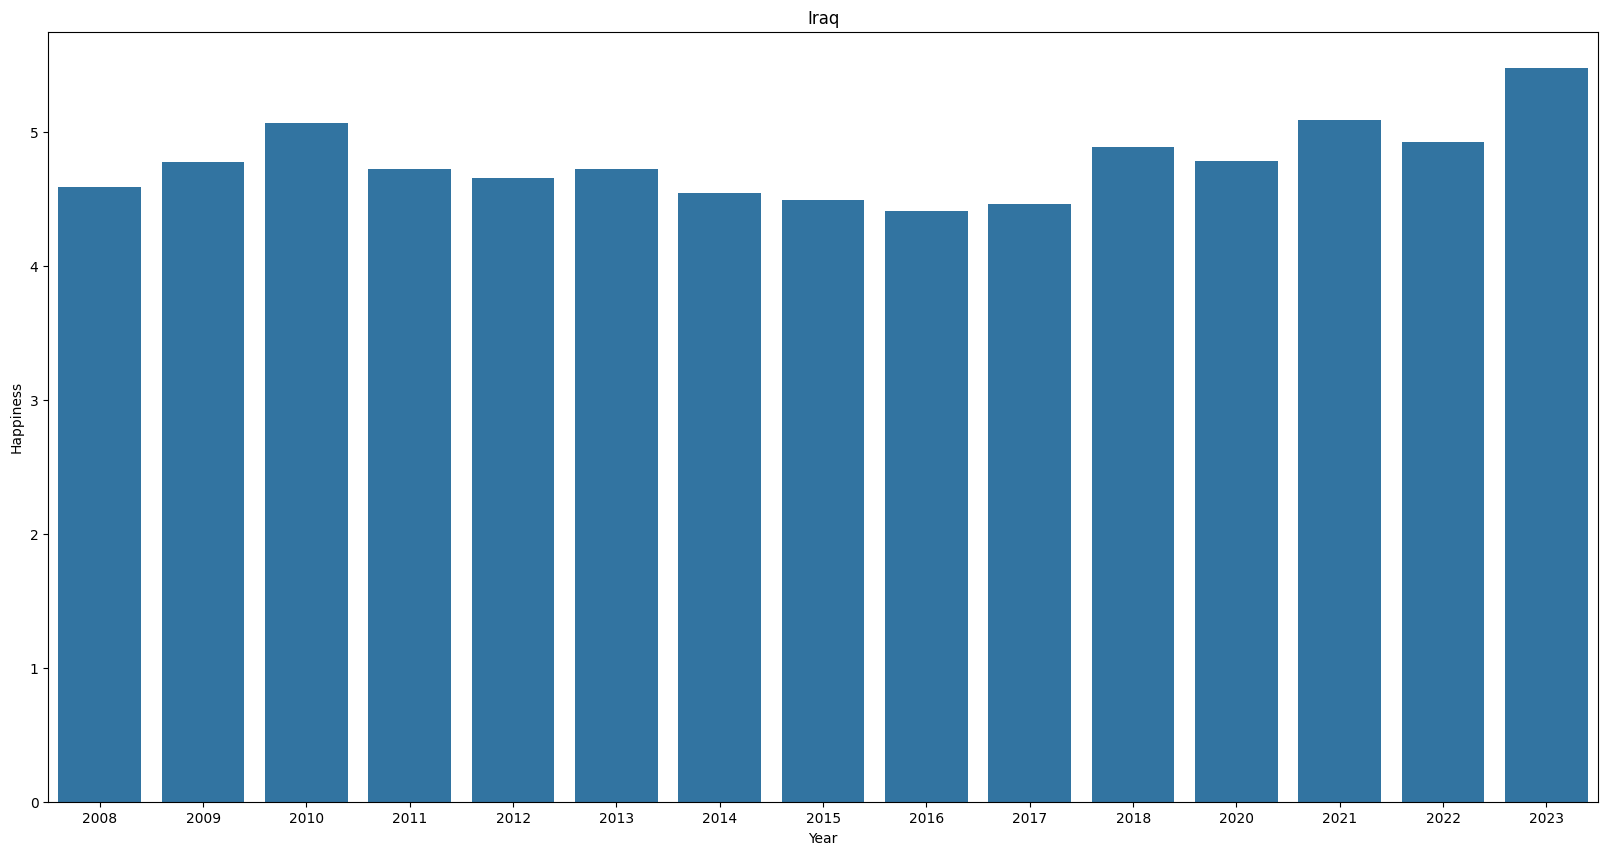

In [17]:
coutry_input = input("What country would you like to see a happiness report on?")
w_h_data2 = w_h_data[w_h_data['country_name'] == coutry_input]
plt.figure(figsize=(20,10))
ax = sns.barplot(x='year', y='life_ladder', data=w_h_data2, errorbar=None)
ax.set_xlabel("Year")
ax.set_ylabel("Happiness")
plt.title(coutry_input)
plt.show()

GDP deflator is a price index that measures the average price of all goods and services produced in an economy. Simply put, it helps show whether changes in GDP are due to increased production or higher prices. A positive GDP deflator shows inflation. 

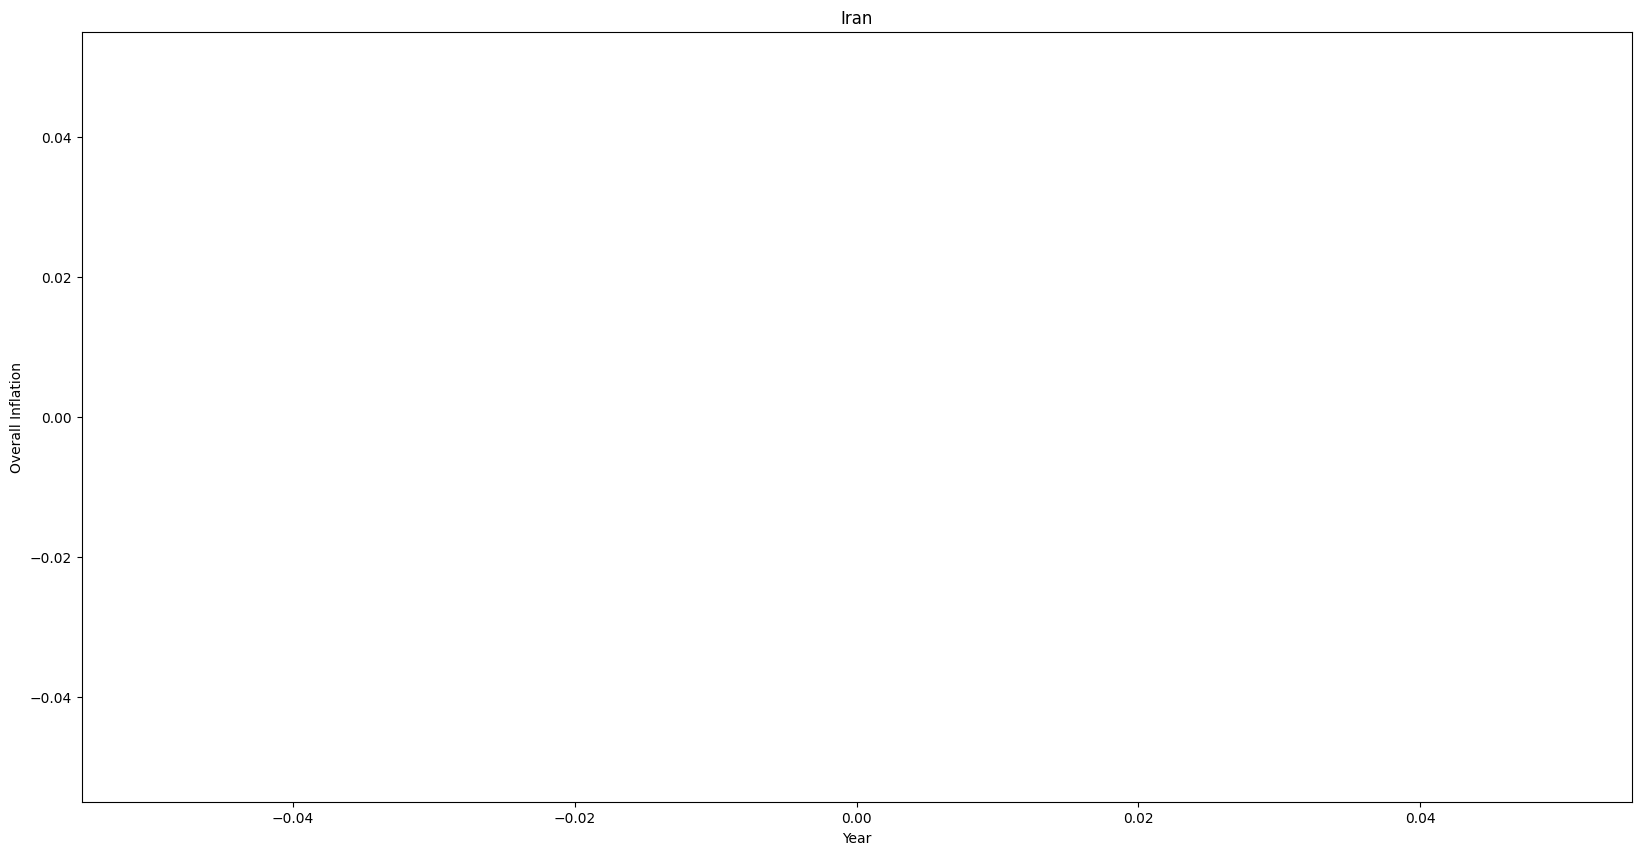

In [18]:
coutry_input2 = input("What country would you like to see an inflation report on?")
inf_data2 = inf_data[inf_data['country'] == coutry_input2]
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='year', y='gdp_deflator_index', data=inf_data2, errorbar=None)
ax.set_xlabel("Year")
ax.set_ylabel("Overall Inflation")
plt.title(coutry_input2)
plt.show()

The happinest nations feel they have a lot of freedom of choice while perceptions of corrution vary widely.
For the unhappy nations, perception of corruption is high while freedom of choice varies widely.

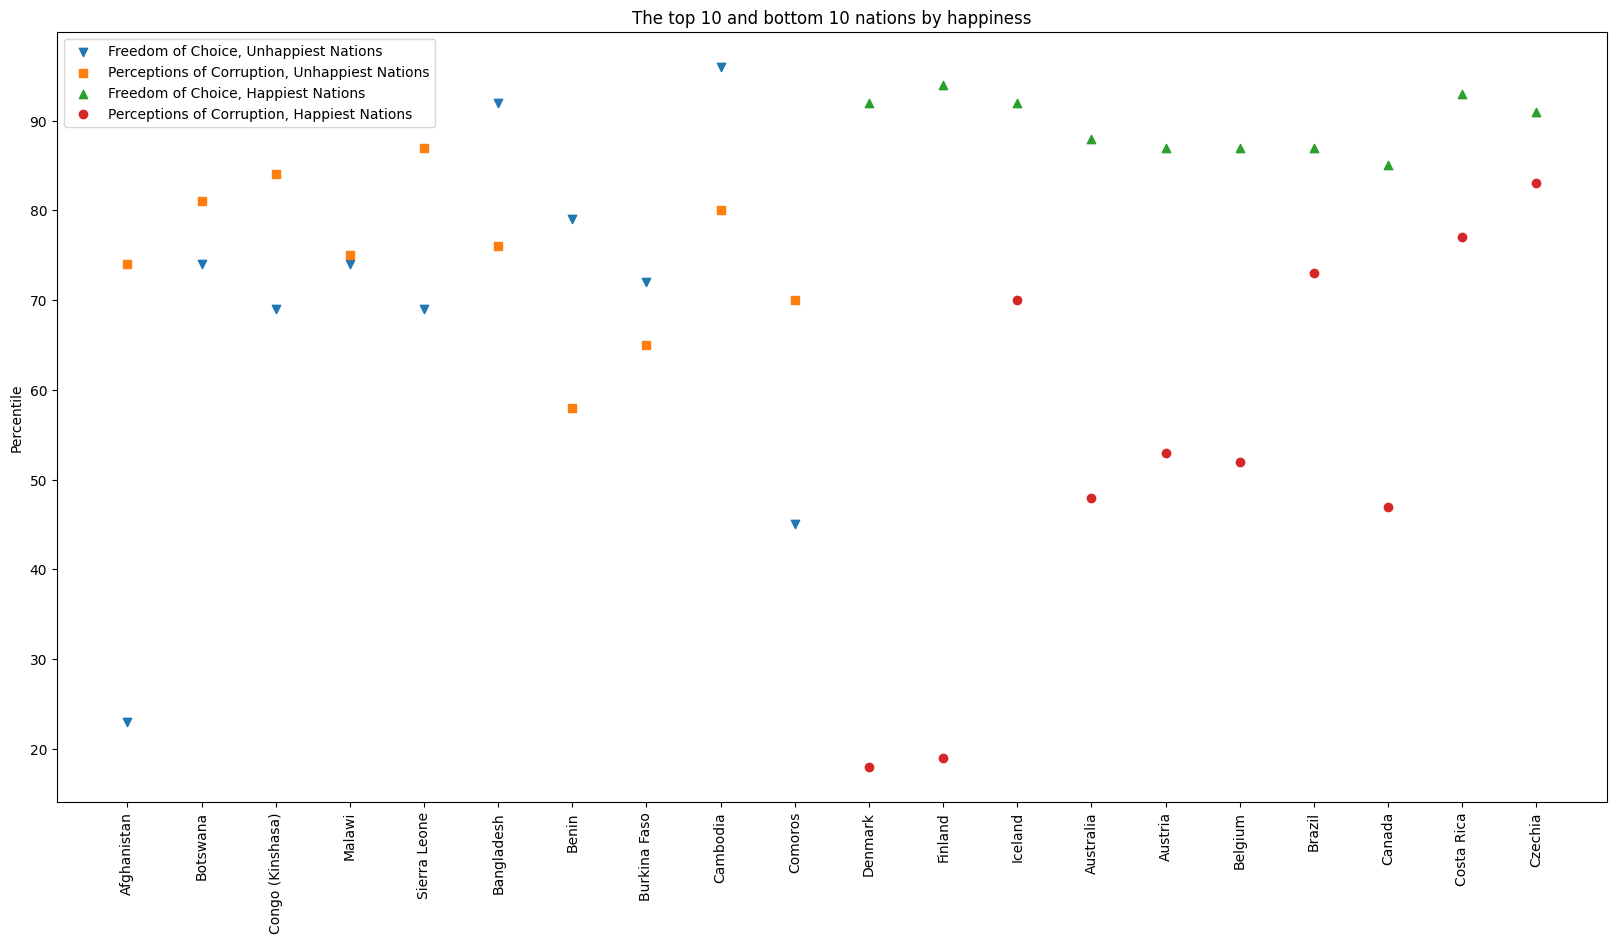

In [19]:
fun_ran = False

def make_percent():
    global fun_ran
    if not fun_ran:
        w_h_data['life_choices'] = w_h_data['life_choices'] *100
        w_h_data['perceptions_of_corruption'] = w_h_data['perceptions_of_corruption'] *100
        w_h_data['generosity'] = w_h_data['generosity'] * 100
    
make_percent()

w_h_data2 = w_h_data[~w_h_data['life_choices'].isin(['No data'])]
w_h_data2 = w_h_data[~w_h_data['perceptions_of_corruption'].isin(['No data'])]
w_h_data2 = w_h_data2.map(lambda x: int(round(x, 0)) if isinstance(x, (int, float)) else x)

bottom_10_group = w_h_data2[w_h_data2['year'] == 2023]
bottom_10 = bottom_10_group.nsmallest(10, 'life_ladder')
top_10_group = w_h_data2[w_h_data2['year'] == 2023]
top_10 = top_10_group.nlargest(10, 'life_ladder')
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(bottom_10['country_name'], bottom_10['life_choices'], label='Freedom of Choice, Unhappiest Nations', marker='v')
plt.scatter(bottom_10['country_name'], bottom_10['perceptions_of_corruption'], label='Perceptions of Corruption, Unhappiest Nations', marker='s')
plt.scatter(top_10['country_name'], top_10['life_choices'], label='Freedom of Choice, Happiest Nations', marker='^')
plt.scatter(top_10['country_name'], top_10['perceptions_of_corruption'], label='Perceptions of Corruption, Happiest Nations', marker='o')
plt.ylabel('Percentile')
plt.legend()
plt.plot()
plt.title('The top 10 and bottom 10 nations by happiness')
plt.show()



Converting dataframes to SQL

In [20]:
conn = sqlite3.connect("happiness_data.db")
cursor = conn.cursor()


cursor.execute("""
CREATE TABLE IF NOT EXISTS world_happiness (
    country_name TEXT PRIMARY KEY,
    year INTEGER NOT NULL,
    life_ladder REAL NOT NULL,
    gdp_per_capita TEXT NOT NULL,
    social_support TEXT NOT NULL,
    healthy_life_expectancy_at_birth TEXT NOT NULL,
    life_choices TEXT NOT NULL,
    generosity TEXT NOT NULL,
    perceptions_of_corruption TEXT NOT NULL,
    positive_affect TEXT NOT NULL,
    negative_affect TEXT NOT NULL
);
""")

w_h_data.to_sql("world_happiness", conn, if_exists="replace", index=False)
conn.commit()

In [21]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS expectancy (
    country TEXT PRIMARY KEY,
    male_life_expectancy TEXT NOT NULL,
    female_life_expectancy TEXT NOT NULL, 
    happiness_score TEXT NOT NULL,
    fertility_rate TEXT NOT NULL,
    gdp_per_capita TEXT NOT NULL,
    suicide_rate TEXT NOT NULL
);
""")

life_death_data.to_sql("expectancy", conn, if_exists="replace", index=False)
conn.commit()

In [22]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS inflation (
    country TEXT PRIMARY KEY,
    year INTEGER NOT NULL,
    energy_consumer_price_inflation TEXT NOT NULL, 
    food_consumer_price_inflation TEXT NOT NULL,
    gdp_deflator_index_growth_rate TEXT NOT NULL,
    score REAL NOT NULL,
    gdp_per_capita REAL NOT NULL,
    freedom_to_make_life_choices REAL NOT NULL
);
""")

inf_data.to_sql("inflation", conn, if_exists="replace", index=False)
conn.commit()

In [23]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS global (
    country TEXT PRIMARY KEY,
    armed_forces_size TEXT NOT NULL,
    birth_rate TEXT NOT NULL, 
    fertility_rate TEXT NOT NULL,
    gdp TEXT NOT NULL,
    primary_education_enrollment TEXT NOT NULL,
    tertiary_education_enrollment TEXT NOT NULL,
    infant_mortality TEXT NOT NULL,
    life_expectancy TEXT NOT NULL, 
    maternal_mortality_ratio TEXT NOT NULL,
    minimum_wage TEXT NOT NULL,
    out_of_pocket_health_expenditure TEXT NOT NULL,
    physicians_per_thousand TEXT NOT NULL,
    population INTEGER NOT NULL,
    labor_force_participation TEXT NOT NULL, 
    tax_revenue TEXT NOT NULL,
    unemployment_rate TEXT NOT NULL
);
""")

gci_data.to_sql("global", conn, if_exists="replace", index=False)
conn.commit()



The happiness score of countries with low minimum wage and high cost of health care (by joining of the expectancy and global tables).

In [24]:
cursor.execute("""
    SELECT expectancy.happiness_score, global.country
    FROM expectancy
    JOIN global
    ON expectancy.country = global.country
    WHERE out_of_pocket_health_expenditure > 25
    AND minimum_wage < 10
""")
cursor.fetchall()

[('3.794', 'Afghanistan'),
 ('4.959', 'Albania'),
 ('5.605', 'Algeria'),
 ('4.105', 'Angola'),
 ('4.853', 'Armenia'),
 ('5.129', 'Azerbaijan'),
 ('4.527', 'Bangladesh'),
 ('5.892', 'Belarus'),
 ('4.923', 'Benin'),
 ('5.139', 'Bolivia'),
 ('5.246', 'Bosnia and Herzegovina'),
 ('4.517', 'Botswana'),
 ('6.226', 'Brazil'),
 ('5.687', 'Bulgaria'),
 ('4.944', 'Burkina Faso'),
 ('4.442', 'Cameroon'),
 ('3.351', 'Central African Republic'),
 ('4.053', 'Chad'),
 ('5.906', 'China'),
 ('6.376', 'Cuba'),
 ('5.972', 'Dominican Republic'),
 ('5.788', 'El Salvador'),
 ('4.935', 'Equatorial Guinea'),
 ('4.991', 'Gabon'),
 ('5.225', 'Georgia'),
 ('4.687', 'Ghana'),
 ('5.703', 'Guatemala'),
 ('3.652', 'Guinea-Bissau'),
 ('3.766', 'Haiti'),
 ('5.821', 'Honduras'),
 ('4.527', 'India'),
 ('5.135', 'Indonesia'),
 ('4.707', 'Iran'),
 ('4.739', 'Iraq'),
 ('5.081', 'Jordan'),
 ('5.766', 'Kazakhstan'),
 ('4.471', 'Kenya'),
 ('No data', 'Kyrgyzstan'),
 ('4.811', 'Laos'),
 ('6.342', 'Libya'),
 ('6.141', 'Malaysia

Joining the world happiness and inflation data tables based on the primary key of country names, comparing low generosity and high food inflation with happiness. 
As you can see, these 2 things do not necessarily make people unhappy, as several countries rank in the 6-7+ happiness range, even with negative generosity scores and food inflation of more than 20%. 

In [41]:
cursor.execute("""
    SELECT world_happiness.country_name, world_happiness.life_ladder
    FROM world_happiness
    INNER JOIN inflation
    ON world_happiness.country_name = inflation.country
    WHERE world_happiness.generosity < 0 AND
    inflation.food_inflation > 20 AND          
    inflation.year = 2023 AND
    world_happiness.year = 2023
""")
cursor.fetchall()

[('Bolivia', 5.859886169),
 ('Brazil', 6.552690983),
 ('Costa Rica', 7.384068966),
 ('Dominican Republic', 5.921262264),
 ('Ecuador', 5.851753712),
 ('El Salvador', 6.481846809),
 ('Finland', 7.69892931),
 ('Gabon', 5.104125023),
 ('Georgia', 5.350635052),
 ('Hungary', 5.965178013),
 ('Iraq', 5.475371838),
 ('Japan', 5.910115719),
 ('Lebanon', 3.587908268),
 ('Mauritius', 5.759169102),
 ('Mexico', 7.005731583),
 ('Panama', 6.543289661),
 ('Paraguay', 6.213788509),
 ('Peru', 5.935666084),
 ('Philippines', 6.183511734),
 ('Slovakia', 6.260521889),
 ('Tajikistan', 5.379470825),
 ('Togo', 4.364938736),
 ('Uruguay', 6.661721706),
 ('Vietnam', 6.325115204),
 ('Zimbabwe', 3.572386265)]

The happiest countries by year.

In [ ]:
cursor.execute("""
    SELECT country_name, year FROM world_happiness
    WHERE life_ladder > 7.5
""")
cursor.fetchall()

[('Canada', 2010),
 ('Canada', 2013),
 ('Costa Rica', 2009),
 ('Denmark', 2005),
 ('Denmark', 2007),
 ('Denmark', 2008),
 ('Denmark', 2009),
 ('Denmark', 2010),
 ('Denmark', 2011),
 ('Denmark', 2012),
 ('Denmark', 2013),
 ('Denmark', 2014),
 ('Denmark', 2015),
 ('Denmark', 2016),
 ('Denmark', 2017),
 ('Denmark', 2018),
 ('Denmark', 2019),
 ('Denmark', 2020),
 ('Denmark', 2021),
 ('Denmark', 2022),
 ('Denmark', 2023),
 ('Finland', 2006),
 ('Finland', 2008),
 ('Finland', 2016),
 ('Finland', 2017),
 ('Finland', 2018),
 ('Finland', 2019),
 ('Finland', 2020),
 ('Finland', 2021),
 ('Finland', 2022),
 ('Finland', 2023),
 ('Iceland', 2012),
 ('Iceland', 2013),
 ('Iceland', 2016),
 ('Iceland', 2019),
 ('Iceland', 2020),
 ('Iceland', 2021),
 ('Iceland', 2023),
 ('Ireland', 2008),
 ('Israel', 2021),
 ('Israel', 2022),
 ('Netherlands', 2008),
 ('Netherlands', 2010),
 ('Netherlands', 2011),
 ('Netherlands', 2016),
 ('Netherlands', 2020),
 ('New Zealand', 2007),
 ('Norway', 2008),
 ('Norway', 2012),

The unhappiest countries by year.

In [ ]:
cursor.execute("""
    SELECT country_name, year FROM world_happiness
    WHERE life_ladder < 3
""")
cursor.fetchall()

[('Afghanistan', 2017),
 ('Afghanistan', 2018),
 ('Afghanistan', 2019),
 ('Afghanistan', 2021),
 ('Afghanistan', 2022),
 ('Afghanistan', 2023),
 ('Burundi', 2014),
 ('Central African Republic', 2016),
 ('Lebanon', 2020),
 ('Lebanon', 2021),
 ('Lebanon', 2022),
 ('Liberia', 2015),
 ('Sierra Leone', 2008),
 ('Sierra Leone', 2022),
 ('South Sudan', 2016),
 ('South Sudan', 2017),
 ('Syria', 2013),
 ('Tanzania', 2016),
 ('Togo', 2008),
 ('Togo', 2011),
 ('Togo', 2014),
 ('Yemen', 2015),
 ('Zimbabwe', 2019)]

Countries with high suicide rates. (More than 40 per 100k)

In [ ]:
cursor.execute("""
    SELECT country FROM expectancy
    WHERE suicide_rate > 40
""")
cursor.fetchall()

[('Brunei',),
 ('Cabo Verde',),
 ('Korea, Dem. Rep.',),
 ('Korea, Rep.',),
 ('Kosovo',),
 ('Kyrgyz Republic',),
 ('Macedonia, FYR',),
 ('Pakistan',),
 ('Qatar',),
 ('Singapore',),
 ('United Arab Emirates',)]

Countries with short(er) life spans. (Under 70 years)

In [42]:
cursor.execute("""
    SELECT country FROM global
    WHERE life_expectancy < 70 
""")
cursor.fetchall()

[('Afghanistan',),
 ('Angola',),
 ('Benin',),
 ('Botswana',),
 ('Burkina Faso',),
 ('Burundi',),
 ('Ivory Coast',),
 ('Cambodia',),
 ('Cameroon',),
 ('Central African Republic',),
 ('Chad',),
 ('Republic of the Congo',),
 ('Democratic Republic of the Congo',),
 ('Equatorial Guinea',),
 ('Eritrea',),
 ('Ethiopia',),
 ('Gabon',),
 ('The Gambia',),
 ('Ghana',),
 ('Guinea',),
 ('Guinea-Bissau',),
 ('Haiti',),
 ('India',),
 ('Kenya',),
 ('Laos',),
 ('Lesotho',),
 ('Liberia',),
 ('Madagascar',),
 ('Malawi',),
 ('Mali',),
 ('Mauritania',),
 ('Mongolia',),
 ('Mozambique',),
 ('Myanmar',),
 ('Namibia',),
 ('Niger',),
 ('Nigeria',),
 ('Pakistan',),
 ('Papua New Guinea',),
 ('Rwanda',),
 ('Senegal',),
 ('Sierra Leone',),
 ('Somalia',),
 ('South Africa',),
 ('South Sudan',),
 ('Sudan',),
 ('Tanzania',),
 ('East Timor',),
 ('Togo',),
 ('Turkmenistan',),
 ('Uganda',),
 ('Yemen',),
 ('Zambia',),
 ('Zimbabwe',)]